<a href="https://colab.research.google.com/github/profshai/Python-MachineLearning-DeepLearning-Projects/blob/master/Convolutional_Neural_Network_on_CIFAR_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Multiple Classes

## Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

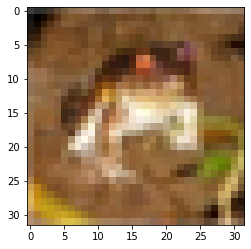

In [6]:
plt.imshow(x_train[0])

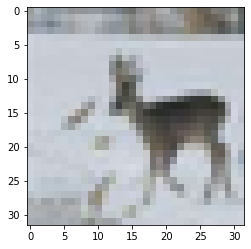

In [7]:
plt.imshow(x_train[20])

## PreProcessing

In [8]:
x_train[0].max()

255

In [0]:
#normalize the size to between 0 and 1
x_train=x_train/255
x_test=x_test/255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
#Converts a class vector (integers) to binary class matrix.
y_cat_train=to_categorical(y_train, 10)
y_cat_test=to_categorical(y_test, 10)

In [15]:
y_train[0] #corresponds to 6 on the CIFAR dataset as can be vefified online

array([6], dtype=uint8)

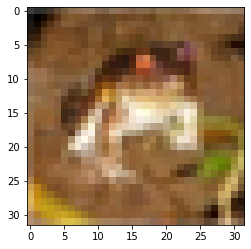

In [16]:
plt.imshow(x_train[0])

## Building the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

#We need an extra convolutional layer
## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop=EarlyStopping(monitor='val_loss', patience=2)

In [23]:
model.fit(x_train, y_cat_train, epochs=15,
          validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5194 - accuracy: 0.4538 - val_loss: 1.2546 - val_accuracy: 0.5619
Epoch 2/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1675 - accuracy: 0.5900 - val_loss: 1.0738 - val_accuracy: 0.6298
Epoch 3/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0177 - accuracy: 0.6461 - val_loss: 1.0913 - val_accuracy: 0.6236
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9138 - accuracy: 0.6846 - val_loss: 1.0790 - val_accuracy: 0.6377


In [0]:
metrics=pd.DataFrame(model.history.history)

In [25]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.519357,0.45382,1.254550,0.5619
1,1.167460,0.59002,1.073837,0.6298
2,1.017714,0.64606,1.091309,0.6236
3,0.913752,0.68462,1.079045,0.6377


In [26]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

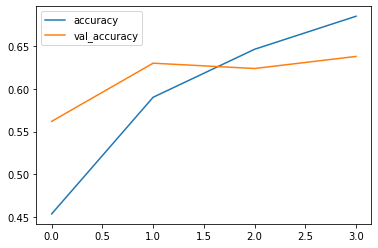

In [27]:
metrics[['accuracy', 'val_accuracy']].plot()

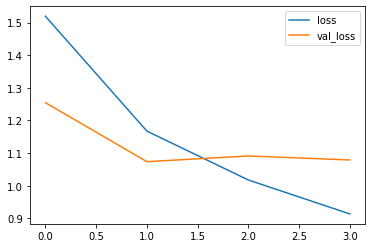

In [28]:
metrics[['loss', 'val_loss']].plot()

In [29]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.0790449380874634, 0.6377000212669373]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
print(classification_report(y_test,predictions)) #model performs poorly on class 3...Cats and dogs are difficult to predict given the blurred images

              precision    recall  f1-score   support

           0       0.56      0.76      0.65      1000
           1       0.81      0.73      0.76      1000
           2       0.45      0.67      0.54      1000
           3       0.50      0.45      0.47      1000
           4       0.66      0.51      0.58      1000
           5       0.64      0.42      0.51      1000
           6       0.78      0.68      0.73      1000
           7       0.82      0.61      0.70      1000
           8       0.61      0.86      0.71      1000
           9       0.75      0.68      0.71      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000



In [35]:
confusion_matrix(y_test,predictions)

array([[755,  10,  62,   8,   8,   1,   8,   1, 126,  21],
       [ 54, 727,  10,   8,   4,   1,   6,   0, 112,  78],
       [ 97,   6, 672,  36,  49,  31,  45,  14,  37,  13],
       [ 67,  16, 161, 452,  51, 103,  46,  24,  50,  30],
       [ 71,   6, 182,  70, 512,  33,  38,  41,  37,  10],
       [ 48,   6, 165, 197,  37, 425,  33,  40,  33,  16],
       [ 31,  13, 112,  81,  29,   9, 681,   3,  28,  13],
       [ 63,   6,  79,  48,  77,  56,   4, 614,  22,  31],
       [ 82,  24,  13,   3,   1,   2,   0,   1, 862,  12],
       [ 72,  89,  21,  10,   4,   4,   7,   8, 108, 677]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


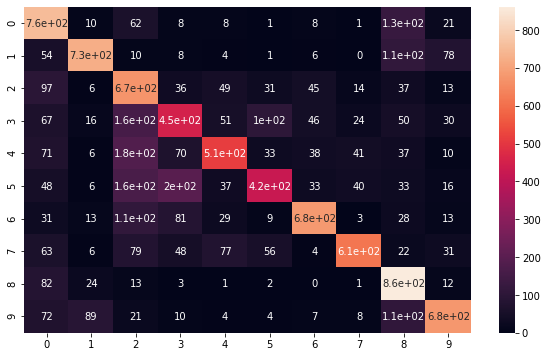

In [36]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

In [0]:
my_image=x_test[16]

In [44]:
my_image

array([[[0.37254902, 0.29803922, 0.30588235],
        [0.36078431, 0.30196078, 0.30588235],
        [0.34901961, 0.30196078, 0.30196078],
        ...,
        [0.11764706, 0.10980392, 0.14901961],
        [0.68627451, 0.71764706, 0.74901961],
        [0.88235294, 0.91764706, 0.94117647]],

       [[0.35294118, 0.27843137, 0.28627451],
        [0.3372549 , 0.28235294, 0.28235294],
        [0.3254902 , 0.27843137, 0.27843137],
        ...,
        [0.        , 0.        , 0.05098039],
        [0.23529412, 0.24705882, 0.30980392],
        [0.64705882, 0.67058824, 0.74117647]],

       [[0.34509804, 0.27058824, 0.27843137],
        [0.32941176, 0.2745098 , 0.2745098 ],
        [0.32156863, 0.2745098 , 0.2745098 ],
        ...,
        [0.01960784, 0.        , 0.04705882],
        [0.09411765, 0.10196078, 0.18823529],
        [0.49803922, 0.54509804, 0.64705882]],

       ...,

       [[0.79607843, 0.69019608, 0.63137255],
        [0.83529412, 0.68627451, 0.61176471],
        [0.79215686, 0

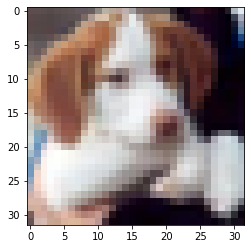

In [45]:
plt.imshow(my_image)

In [48]:
y_test[16]

array([5], dtype=uint8)

In [50]:
model.predict_classes(my_image.reshape(1,32,32,3)) #correct prediction of dog

array([5])

End of Notebook!